# Lab 7: Convolutions and Convolutional neural networks

```
- Machine Learning, Innopolis University (Fall semester 2024)
- Instructors: Adil Khan & Gcinizwe Dlamini
```
<hr>


```
In this lab, you will practice simple deep learning model in Pytorch.

Lab Plan
1. Convolutions - application examples
2. Building CNN in PyTorch
    - example CNN
    - comparing with Fully-connected NN

```

<hr>

## 1. Recap

1. What is the use of convolutions? (In general)
2. Why use convolutional layers instead of fully-connected ones?



## 2. Convolutions
Let's upload some image (you can try your own image changing the url)

In [1]:
import urllib.request
url = "https://www.dropbox.com/scl/fi/0n8y4jtqdt51xedwgpb5g/grid_img.jpg?rlkey=ud5912lz83u0z05dicfvq1w3z&st=stuhlkhe&dl=1"
filename = 'grid_img.jpg'
urllib.request.urlretrieve(url, filename)

('grid_img.jpg', <http.client.HTTPMessage at 0x121ce0b1ae0>)

## 2. Reading image data

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from scipy import ndimage

# Let's read and plot the image
image = plt.imread('grid_img.jpg')
plt.imshow(image)

ModuleNotFoundError: No module named 'skimage'

## 2.1 Operations on Image Data

In [ ]:
gray_image = rgb2gray(image)
plt.imshow(gray_image * 100, cmap='gray')
print("original img shape: ", image.shape)
print("grayscale img shape", gray_image.shape)

## 2.2 Convolutions for edge-detecting

In [ ]:
# first, let's define edge-detecting filters
horizontal_kernel = np.array([[1, 1, 1],
                              [0, 0, 0],
                              [-1, -1, -1]])
print(horizontal_kernel, 'is a kernel for detecting horizontal edges')

vertical_kernel = np.array([[-1, 0, 1],
                            [-1, 0, 1],
                            [-1, 0, 1]])
print(vertical_kernel, 'is a kernel for detecting vertical edges')

# out_h = ndimage.convolve(gray_image, sobel_horizontal, mode='reflect')
# out_v = ndimage.convolve(gray_image, sobel_vertical, mode='reflect')

Let's apply different types of convolutions on this image. Complete the following function.

Take care of dimensions - the resuting image should be of the same size.
Hint:

![alt text](https://i.gyazo.com/5265866b07235dfa181de39913e94713.png)

**TASK:** Define the convolution method

In [3]:
# Apply kernel on input image such that the image size is preserved
def convolve(img, kernel):
    height, width = img.shape
    kernel_size  = kernel.shape[0]

    # Ensure the kernel size is odd for symmetrical padding
    if (kernel_size  - 1) % 2 != 0:
        raise ValueError("Invalid kernel size. Kernel size must be odd for proper padding.")

    padding = (kernel_size  - 1) // 2

    # Use np.pad for consistent padding, with zero padding on edges
    padded_img = np.pad(img, ((padding,)), mode='constant', constant_values=0)

    # Initialize the result array
    result = [[np.sum(padded_img[i:i+kernel_size, j:j+kernel_size] * kernel) 
                    for j in range(width)] 
                    for i in range(height)]

    # TODO : Perform convolution by sliding the kernel over the image

    return result

# Example usage
c = convolve(gray_image, horizontal_kernel)
print("Horizontal kernel applied")
plt.imshow(c, cmap='gray')
plt.show()

NameError: name 'gray_image' is not defined

Vertical kernel applied


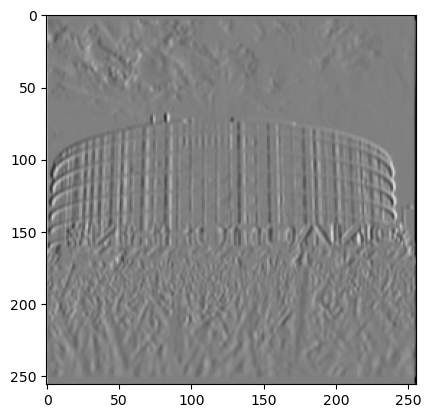

In [19]:
c = convolve(gray_image, vertical_kernel)
print("Vertical kernel applied")
plt.imshow(c, cmap='gray')

Your kernel applied


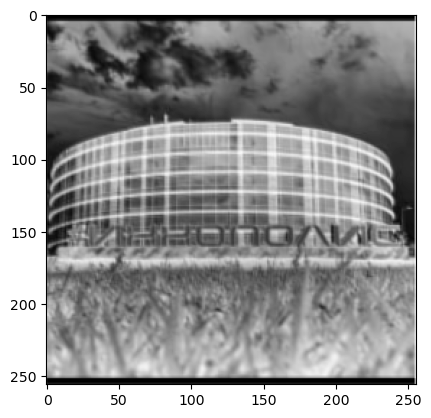

In [21]:
# play with numbers, see how changing the kernel affects the result
your_kernel = np.array([[-1, -2, -3],
                        [0, 0, -2],
                        [0, 0, -1]])

c = convolve(gray_image, your_kernel)
print("Your kernel applied")
plt.imshow(c, cmap='gray')

some_kernel = np.array([[-1]])

## 3. CNN with PyTorch

### 3.1. Data Loading

In [23]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Random seed for reproducibility
torch.manual_seed(42)

# Device configuration: Use GPU if available, otherwise CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Batch sizes
train_batch_size = 32
test_batch_size = 100

# Data transformations: Normalize with mean and std values for MNIST
data_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # Normalize with MNIST mean and std
])

# Define dataset paths
data_path = os.path.join(".", "data")

# Load MNIST datasets with transformations
train_dataset = datasets.MNIST(root=data_path, train=True, download=True, transform=data_transforms)
test_dataset = datasets.MNIST(root=data_path, train=False, download=True, transform=data_transforms)

# Data loaders: Shuffle training data, no need to shuffle test data
train_loader = DataLoader(dataset=train_dataset, batch_size=train_batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=test_batch_size, shuffle=False)

# Print device information
print(f"Using device: {device}")

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:04<00:00, 2.00MB/s]


Extracting .\data\MNIST\raw\train-images-idx3-ubyte.gz to .\data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 354kB/s]


Extracting .\data\MNIST\raw\train-labels-idx1-ubyte.gz to .\data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.41MB/s]


Extracting .\data\MNIST\raw\t10k-images-idx3-ubyte.gz to .\data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 1.76MB/s]


Extracting .\data\MNIST\raw\t10k-labels-idx1-ubyte.gz to .\data\MNIST\raw

Using device: cpu


## 3.2 CNN model

**Task:**
- Define a CNN model with two convolutional layes, dropout layer and two fully connected layers (one hidden layer + output layer)
- Define the forward method in the CNN model where each convolutional layer is followed by a max pooling and each fully connected layer followed by dropout.
- Use Relu as activation function for the all hidden layers
- Use kernel size = 5 for the convolutional layes

In [9]:
class CNN(nn.Module):
    # Convolution formula: ((n + 2p - f) / s) + 1

    def __init__(self):
        super(CNN, self).__init__()

        # First convolutional layer: input channels = 1 (grayscale), output channels = 10, kernel size = 5
        self.conv1 = None # TODO

        # Second convolutional layer: input channels = 10, output channels = 20, kernel size = 5
        self.conv2 = None # TODO

        # Dropout layer for conv layers
        self.conv_drop = nn.Dropout2d()

        # Fully connected layers
        # The input size (??) is dynamically determined in the forward pass
        self.fc1 = nn.Linear(in_features=None, out_features=50)  # TODO: To be dynamically calculated
        self.fc2 = None   # TODO: 10 output classes for MNIST

        # Dropout for fully connected layers
        self.fc_drop = nn.Dropout(p=0.5)

    def forward(self, x):
        # Conv1 -> ReLU -> MaxPool
        x = None # TODO
        # Calculate the shape after this layer:
        # Input: (28x28x1), Output: (?? x ?? x ??), Pooling: (?? x ?? x ??)

        # Conv2 -> ReLU -> MaxPool -> Dropout
        x = torch.relu(torch.max_pool2d(self.conv_drop(self.conv2(x)), kernel_size=2))
        # Input: (?? x ?? x ??), Output: (?? x ?? x ??), Pooling: (?? x ?? x ??)

        # Flattening the output to feed into fully connected layers
        x = x.view(x.size(0), -1)  # Automatically computes the correct flattening size
        # Flattened size: ?? (height * width * channels)

        # FC1 -> ReLU -> Dropout
        x = torch.relu(self.fc1(x))
        x = self.fc_drop(x)

        # FC2 -> LogSoftmax for final output
        x = self.fc2(x)
        return None # TODO

# Device configuration: Automatically set to CUDA if available, otherwise CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Model initialization and sending to the device
model_cnn = CNN().to(device)

## 2.2 Fully-conected model from the last class

 TASK: reducing number of params to match that of CNN

In [10]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        # Reduce the number of neurons to match the parameter count of a typical CNN
        self.fc1 = nn.Linear(28*28, 256)  # Input layer: 28*28 pixels, reduced to 256
        self.fc2 = nn.Linear(256, 128)    # Hidden layer 1: 256 -> 128
        self.fc3 = nn.Linear(128, 64)     # Hidden layer 2: 128 -> 64
        self.fc4 = nn.Linear(64, 10)      # Output layer: 64 -> 10 (for 10 classes)

        # Dropout to prevent overfitting
        self.dropout = nn.Dropout(p=0.5)

        # Initialize weights using a uniform distribution for better convergence
        self._init_weights()

    def _init_weights(self):
        """Custom weight initialization to improve training stability"""
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.kaiming_uniform_(m.weight, nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0.01)

    def forward(self, x):
        # Flatten the input tensor (batch_size, 28*28)
        x = x.view(-1, 28*28)

        # Forward pass through the fully connected layers with ReLU activations
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)  # Apply dropout after each hidden layer

        x = torch.relu(self.fc2(x))
        x = self.dropout(x)

        x = torch.relu(self.fc3(x))
        x = self.dropout(x)

        # Output layer (log_softmax for classification)
        x = self.fc4(x)
        return torch.nn.functional.log_softmax(x, dim=1)

# Device configuration: Use GPU if available, otherwise CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Model instantiation and sending to the device
model_nn = Net().to(device)


### Counting number of model trainable parameters

In [11]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [12]:
# Let's compare the number of parameters of these models:
print("Number of params in the Fully-connected model:", count_parameters(model_nn))
print("Number of params in the CNN model:", count_parameters(model_cnn))

Number of params in the Fully-connected model: 242762
Number of params in the CNN model: 21840


Task: Try changing the fully-connected model to have the same number of parameters as CNN and compare the resulting performance

## 3. Training and testing

In [13]:
from tqdm import tqdm  # For progress bar
from sklearn.metrics import f1_score

def train(model, device, train_loader, optimizer, epoch):
    model.train()
    total_loss = 0
    correct = 0
    num_batches = len(train_loader)

    # tqdm progress bar for better tracking of batch progress
    for batch_idx, (data, target) in enumerate(tqdm(train_loader, desc=f"Training Epoch {epoch}")):
        data, target = data.to(device), target.to(device)

        # TODO: Zero the gradients

        # TODO: Forward pass
        output = None

        # TODO: Calculate loss
        loss = None

        # TODO: Backward pass

        # Accumulate loss for average calculation
        total_loss += loss.item()

        # Calculate accuracy
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()

    avg_loss = total_loss / num_batches
    accuracy = 100. * correct / len(train_loader.dataset)
    print(f'==> Epoch {epoch} Completed: Average Loss: {avg_loss:.6f}\tAccuracy: {accuracy:.2f}%')


def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    all_preds = []  # Store all predictions
    all_targets = []  # Store all true labels
    with torch.no_grad():
        for data, target in tqdm(test_loader, desc="Testing"):
            data, target = data.to(device), target.to(device)

            # Forward pass (no backprop during evaluation)
            output = model(data)
            test_loss += torch.nn.functional.nll_loss(output, target, reduction='sum').item()  # Sum up batch loss

            # Prediction and accuracy
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

            all_preds.extend(pred.cpu().numpy())  # Convert predictions to numpy
            all_targets.extend(target.cpu().numpy())  # Convert targets to numpy


    # Calculate test f1, accuracy and loss over all batches
    test_loss /= len(test_loader.dataset)

    f1 = f1_score(all_targets, all_preds, average='weighted')
    accuracy = 100. * correct / len(test_loader.dataset)

    print('Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%), F1-Score {:.2f}\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset), f1))


    # print(f'Test set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({accuracy:.2f}%)')

    # Return test loss and accuracy for tracking
    return test_loss, accuracy


## Training the CNN model

In [14]:
from torch.optim.lr_scheduler import StepLR  # Scheduler for learning rate

# Hyperparameters
epochs = 10
lr = 0.01
momentum = 0.5
patience = 3  # Early stopping patience (Optional)

# Model and optimizer
model = model_cnn.to(device)
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)

# Optional: Learning rate scheduler (reduces the learning rate by a factor of 0.1 every 5 epochs)
scheduler = StepLR(optimizer, step_size=5, gamma=0.1)

# Training loop
best_accuracy = 0
early_stop_counter = 0

for epoch in range(1, epochs + 1):
    print(f"\nEpoch {epoch}/{epochs}")

    # Training phase
    train(model, device, train_loader, optimizer, epoch)

    # Testing phase and result unpacking
    test_loss, test_accuracy = test(model, device, test_loader)

    # Save best model based on test accuracy
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        torch.save(model.state_dict(), "best_mnist_cnn.pt")
        print(f"Best model saved with accuracy: {best_accuracy:.2f}%")
        early_stop_counter = 0  # Reset early stop counter if model improves
    else:
        early_stop_counter += 1

    # Early stopping (Optional)
    if early_stop_counter >= patience:
        print(f"Early stopping at epoch {epoch} due to no improvement in test accuracy.")
        break

    # Step the scheduler (if using a learning rate scheduler)
    scheduler.step()

# Final model save (optional)
torch.save(model.state_dict(), "final_mnist_cnn.pt")
print("Training complete. Model saved as 'final_mnist_cnn.pt'.")



Epoch 1/10


Training Epoch 1: 100%|██████████| 1875/1875 [00:27<00:00, 68.70it/s]


==> Epoch 1 Completed: Average Loss: 0.741085	Accuracy: 75.41%


Testing: 100%|██████████| 100/100 [00:04<00:00, 24.86it/s]


Test set: Average loss: 0.1389, Accuracy: 9572/10000 (95.72%), F1-Score 0.96

Best model saved with accuracy: 95.72%

Epoch 2/10


Training Epoch 2: 100%|██████████| 1875/1875 [00:23<00:00, 79.80it/s]


==> Epoch 2 Completed: Average Loss: 0.325705	Accuracy: 90.11%


Testing: 100%|██████████| 100/100 [00:04<00:00, 21.85it/s]


Test set: Average loss: 0.0955, Accuracy: 9688/10000 (96.88%), F1-Score 0.97

Best model saved with accuracy: 96.88%

Epoch 3/10


Training Epoch 3: 100%|██████████| 1875/1875 [00:25<00:00, 74.38it/s] 


==> Epoch 3 Completed: Average Loss: 0.262574	Accuracy: 92.23%


Testing: 100%|██████████| 100/100 [00:02<00:00, 46.24it/s]


Test set: Average loss: 0.0771, Accuracy: 9766/10000 (97.66%), F1-Score 0.98

Best model saved with accuracy: 97.66%

Epoch 4/10


Training Epoch 4: 100%|██████████| 1875/1875 [00:17<00:00, 104.30it/s]


==> Epoch 4 Completed: Average Loss: 0.229913	Accuracy: 93.26%


Testing: 100%|██████████| 100/100 [00:03<00:00, 31.01it/s]


Test set: Average loss: 0.0720, Accuracy: 9772/10000 (97.72%), F1-Score 0.98

Best model saved with accuracy: 97.72%

Epoch 5/10


Training Epoch 5: 100%|██████████| 1875/1875 [00:18<00:00, 101.31it/s]


==> Epoch 5 Completed: Average Loss: 0.202019	Accuracy: 93.96%


Testing: 100%|██████████| 100/100 [00:02<00:00, 46.62it/s]


Test set: Average loss: 0.0631, Accuracy: 9810/10000 (98.10%), F1-Score 0.98

Best model saved with accuracy: 98.10%

Epoch 6/10


Training Epoch 6: 100%|██████████| 1875/1875 [00:18<00:00, 100.97it/s]


==> Epoch 6 Completed: Average Loss: 0.178291	Accuracy: 94.88%


Testing: 100%|██████████| 100/100 [00:02<00:00, 47.25it/s]


Test set: Average loss: 0.0541, Accuracy: 9842/10000 (98.42%), F1-Score 0.98

Best model saved with accuracy: 98.42%

Epoch 7/10


Training Epoch 7: 100%|██████████| 1875/1875 [00:17<00:00, 104.56it/s]


==> Epoch 7 Completed: Average Loss: 0.166958	Accuracy: 95.13%


Testing: 100%|██████████| 100/100 [00:02<00:00, 43.42it/s]


Test set: Average loss: 0.0541, Accuracy: 9827/10000 (98.27%), F1-Score 0.98


Epoch 8/10


Training Epoch 8: 100%|██████████| 1875/1875 [00:18<00:00, 102.45it/s]


==> Epoch 8 Completed: Average Loss: 0.163453	Accuracy: 95.34%


Testing: 100%|██████████| 100/100 [00:02<00:00, 44.95it/s]


Test set: Average loss: 0.0522, Accuracy: 9839/10000 (98.39%), F1-Score 0.98


Epoch 9/10


Training Epoch 9: 100%|██████████| 1875/1875 [00:30<00:00, 60.86it/s]


==> Epoch 9 Completed: Average Loss: 0.161855	Accuracy: 95.39%


Testing: 100%|██████████| 100/100 [00:02<00:00, 33.52it/s]


Test set: Average loss: 0.0516, Accuracy: 9841/10000 (98.41%), F1-Score 0.98

Early stopping at epoch 9 due to no improvement in test accuracy.
Training complete. Model saved as 'final_mnist_cnn.pt'.


## Train the fully-connected model

In [16]:
# Model and optimizer setup
model = model_nn.to(device)
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)

# Optional: Learning rate scheduler (reduces LR every 5 epochs)
scheduler = StepLR(optimizer, step_size=5, gamma=0.1)

# Initialize parameters
best_accuracy = 0.0
early_stop_counter = 0
patience = 3  # Early stopping patience

for epoch in range(1, epochs + 1):
    print(f"\nEpoch {epoch}/{epochs}")

    # Training phase
    train(model, device, train_loader, optimizer, epoch)

    # Testing phase and result unpacking
    test_loss, test_accuracy = test(model, device, test_loader)

    # Save the best model based on test accuracy
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        torch.save(model.state_dict(), "best_mnist_nn.pt")
        print(f"Best model saved with accuracy: {best_accuracy:.2f}%")
        early_stop_counter = 0  # Reset the early stopping counter
    else:
        early_stop_counter += 1

    # Early stopping mechanism
    if early_stop_counter >= patience:
        print(f"Early stopping at epoch {epoch} due to no improvement in test accuracy.")
        break

    # Step the scheduler (if using one)
    scheduler.step()

# Save the final model (optional)
torch.save(model.state_dict(), "final_mnist_nn.pt")
print("Training complete. Final model saved as 'final_mnist_nn.pt'.")



Epoch 1/10


Training Epoch 1: 100%|██████████| 1875/1875 [00:17<00:00, 105.47it/s]


==> Epoch 1 Completed: Average Loss: 1.034104	Accuracy: 66.31%


Testing: 100%|██████████| 100/100 [00:02<00:00, 48.56it/s]


Test set: Average loss: 0.3084, Accuracy: 9162/10000 (91.62%), F1-Score 0.92

Best model saved with accuracy: 91.62%

Epoch 2/10


Training Epoch 2: 100%|██████████| 1875/1875 [00:17<00:00, 109.96it/s]


==> Epoch 2 Completed: Average Loss: 0.529107	Accuracy: 85.05%


Testing: 100%|██████████| 100/100 [00:02<00:00, 47.88it/s]


Test set: Average loss: 0.2254, Accuracy: 9387/10000 (93.87%), F1-Score 0.94

Best model saved with accuracy: 93.87%

Epoch 3/10


Training Epoch 3: 100%|██████████| 1875/1875 [00:17<00:00, 105.28it/s]


==> Epoch 3 Completed: Average Loss: 0.417668	Accuracy: 88.86%


Testing: 100%|██████████| 100/100 [00:02<00:00, 48.34it/s]


Test set: Average loss: 0.1998, Accuracy: 9462/10000 (94.62%), F1-Score 0.95

Best model saved with accuracy: 94.62%

Epoch 4/10


Training Epoch 4: 100%|██████████| 1875/1875 [00:16<00:00, 111.05it/s]


==> Epoch 4 Completed: Average Loss: 0.358395	Accuracy: 90.42%


Testing: 100%|██████████| 100/100 [00:02<00:00, 48.42it/s]


Test set: Average loss: 0.1729, Accuracy: 9513/10000 (95.13%), F1-Score 0.95

Best model saved with accuracy: 95.13%

Epoch 5/10


Training Epoch 5: 100%|██████████| 1875/1875 [00:18<00:00, 101.10it/s]


==> Epoch 5 Completed: Average Loss: 0.320517	Accuracy: 91.71%


Testing: 100%|██████████| 100/100 [00:02<00:00, 48.22it/s]


Test set: Average loss: 0.1635, Accuracy: 9552/10000 (95.52%), F1-Score 0.96

Best model saved with accuracy: 95.52%

Epoch 6/10


Training Epoch 6: 100%|██████████| 1875/1875 [00:17<00:00, 106.34it/s]


==> Epoch 6 Completed: Average Loss: 0.287119	Accuracy: 92.50%


Testing: 100%|██████████| 100/100 [00:02<00:00, 35.77it/s]


Test set: Average loss: 0.1538, Accuracy: 9576/10000 (95.76%), F1-Score 0.96

Best model saved with accuracy: 95.76%

Epoch 7/10


Training Epoch 7: 100%|██████████| 1875/1875 [00:18<00:00, 103.67it/s]


==> Epoch 7 Completed: Average Loss: 0.274718	Accuracy: 92.91%


Testing: 100%|██████████| 100/100 [00:02<00:00, 39.91it/s]


Test set: Average loss: 0.1504, Accuracy: 9587/10000 (95.87%), F1-Score 0.96

Best model saved with accuracy: 95.87%

Epoch 8/10


Training Epoch 8: 100%|██████████| 1875/1875 [00:17<00:00, 107.65it/s]


==> Epoch 8 Completed: Average Loss: 0.264100	Accuracy: 93.10%


Testing: 100%|██████████| 100/100 [00:02<00:00, 40.51it/s]


Test set: Average loss: 0.1489, Accuracy: 9591/10000 (95.91%), F1-Score 0.96

Best model saved with accuracy: 95.91%

Epoch 9/10


Training Epoch 9: 100%|██████████| 1875/1875 [00:16<00:00, 110.71it/s]


==> Epoch 9 Completed: Average Loss: 0.260221	Accuracy: 93.15%


Testing: 100%|██████████| 100/100 [00:02<00:00, 49.31it/s]


Test set: Average loss: 0.1467, Accuracy: 9598/10000 (95.98%), F1-Score 0.96

Best model saved with accuracy: 95.98%

Epoch 10/10


Training Epoch 10: 100%|██████████| 1875/1875 [00:17<00:00, 106.75it/s]


==> Epoch 10 Completed: Average Loss: 0.260078	Accuracy: 93.26%


Testing: 100%|██████████| 100/100 [00:02<00:00, 46.44it/s]


Test set: Average loss: 0.1455, Accuracy: 9599/10000 (95.99%), F1-Score 0.96

Best model saved with accuracy: 95.99%
Training complete. Final model saved as 'final_mnist_nn.pt'.


## Self-Practice Task: Train a CNN on the Caltech 256 Dataset

**Objective**:
Build, train, and evaluate a CNN model to classify images in the Caltech 256 dataset. You'll:

1. Load and split the dataset into train, validation, and test sets.
2. Define and train a CNN architecture of your choice, and log the performance.
3. Use a pretrained model (e.g., VGG16) for the same task and compare it with your custom CNN based on accuracy and number of parameters.

### Use a Pretrained Model (VGG16)

In [3]:
!pip install gdown

In [5]:
from torchvision import datasets, transforms

data_transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.repeat(3,1,1) if x.shape[0]==1 else x),
    transforms.Normalize([0.48, 0.4, 0.4], [0.229, 0.224, 0.445])
])

full_data = datasets.Caltech256('./data', download=True, transform=data_transform)

 14%|█▍        | 165M/1.18G [01:40<05:19, 3.19MB/s]Downloading...
From (original): https://drive.google.com/uc?id=1r6o0pSROcV1_VwT4oSjA2FBUSCWGuxLK
From (redirected): https://drive.usercontent.google.com/download?id=1r6o0pSROcV1_VwT4oSjA2FBUSCWGuxLK&confirm=t&uuid=4ea696fb-eee9-451c-b853-1880f2bd1c20
To: C:\Users\User\Desktop\Innopolis\Machine Learning\CNN\data\caltech256\256_ObjectCategories.tar

  0%|          | 0.00/1.18G [00:00<?, ?B/s]
  0%|          | 524k/1.18G [00:00<10:28, 1.88MB/s]
  0%|          | 1.05M/1.18G [00:00<11:09, 1.77MB/s]
  0%|          | 1.57M/1.18G [00:00<08:43, 2.26MB/s]
  0%|          | 2.62M/1.18G [00:01<06:36, 2.98MB/s]
  0%|          | 3.15M/1.18G [00:01<05:53, 3.34MB/s]
  0%|          | 3.67M/1.18G [00:01<06:08, 3.20MB/s]
  0%|          | 4.19M/1.18G [00:01<06:49, 2.88MB/s]
  0%|          | 4.72M/1.18G [00:01<05:55, 3.31MB/s]
  0%|          | 5.24M/1.18G [00:01<06:04, 3.23MB/s]
  1%|          | 6.29M/1.18G [00:02<06:07, 3.20MB/s]
  1%|          | 7.34M/1.1

KeyboardInterrupt: 


 16%|█▌        | 191M/1.18G [00:53<04:01, 4.10MB/s]